# LendUp Data Challenge - Loan Approvals

The goal of this data challenge is to utilize the given dataset, sample applicant data from the LendingClub portfolio, and utilize that data to create a model that can assess whether LendingClub should issue a loan to the applicant. The dataset includes a wide variety of information on the applicant, some of which is personal and other information that is more situational/operational in nature.

Let's go through a typical data science process (Clean -> Explore -> Analyse -> Model -> Evaluate) with this dataset!

## Import Data + First Look

Let's first import any modules we need + the actual data, and take a look at all the different features that are present in the dataset:

In [1984]:
# Import any necessary modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1985]:
# Import data + Read
data = pd.read_csv("lending_club_data.csv", low_memory = False)
data.head(5)

,,,,,,,,,,,,,,,,,,,,,Data derived from LendingClub Prospectus (https://www.lendingclub.com/info/prospectus.action)
id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
10129403,11981032.0,7550,36 months,16.24%,3 years,RENT,28000.0,Current,NaN,debt_consolidation,100.0,96.0,8.4,0.0,17.0,72%,4000.0,1864.38,NaN,3828.95380081,5759.0
10149342,12000897.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Current,Borrower added on 12/31/13 > Combining high interest credit cards to lower interest rate.<br>,debt_consolidation,25.0,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.9407269,114834.0
10129454,11981072.0,12000,36 months,10.99%,4 years,RENT,60000.0,Current,Borrower added on 12/31/13 > I would like to use this money to payoff existing credit card debt and use the remaining about to purchase a used car that is fuel efficient.<br>,debt_consolidation,0.0,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.6177583,7137.0
10149577,12001118.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,Fully Paid,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6%,42200.0,29150.98,NaN,38014.1497567,799592.0


In [1986]:
data.describe()

,Data derived from LendingClub Prospectus (https://www.lendingclub.com/info/prospectus.action)
count,160383
unique,118423
top,0.0
freq,32


Immediately, we can notice that the dataframe is actually stored completely stored under one column (as shown above). This discrepency needs to be resolved so we can properly read the data coming in:

In [1987]:
# Fix dataframe issue - set header parameter
applicants = pd.read_csv("lending_club_data.csv", low_memory = True, header = 1)
applicants.columns

Index([u'id', u'member_id', u'loan_amnt', u'term', u'int_rate', u'emp_length',
       u'home_ownership', u'annual_inc', u'loan_status', u'desc', u'purpose',
       u'percent_bc_gt_75', u'bc_util', u'dti', u'inq_last_6mths',
       u'mths_since_recent_inq', u'revol_util', u'total_bc_limit',
       u'total_pymnt', u'mths_since_last_major_derog', u'tot_hi_cred_lim',
       u'tot_cur_bal'],
      dtype='object')

In [1988]:
# Check out the values
applicants.head(5)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,...,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
0,10129403,11981032.0,7550,36 months,16.24%,3 years,RENT,28000.0,Current,NaN,...,96.0,8.40,0.0,17.0,72%,4000.0,1864.38,NaN,3828.953801,5759.0
1,10149342,12000897.0,27050,36 months,10.99%,10+ years,OWN,55000.0,Current,Borrower added on 12/31/13 > Combining high ...,...,53.9,22.87,0.0,8.0,61.2%,35700.0,6198.22,NaN,34359.940727,114834.0
2,10129454,11981072.0,12000,36 months,10.99%,4 years,RENT,60000.0,Current,Borrower added on 12/31/13 > I would like to...,...,15.9,4.62,1.0,3.0,24%,18100.0,2748.84,NaN,16416.617758,7137.0
3,10149577,12001118.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,Fully Paid,NaN,...,67.1,18.55,1.0,3.0,54.6%,42200.0,29150.98,NaN,38014.149757,799592.0
4,10139658,11991209.0,12000,36 months,13.53%,10+ years,RENT,40000.0,Current,NaN,...,79.6,16.94,0.0,17.0,68.8%,7000.0,2851.80,53.0,6471.462236,13605.0


In [1989]:
# First look at some basic numerical statistics
applicants.describe()

,id,member_id,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
count,1.977870e+05,1.881230e+05,197787.000000,1.881230e+05,179096.000000,179012.000000,188123.000000,188123.000000,160263.000000,180628.000000,188123.000000,32497.000000,180628.000000,1.603820e+05
mean,5.090397e+06,5.910758e+06,14070.907213,7.223871e+04,53.557030,66.829415,17.058663,0.803581,6.991770,20240.250448,8038.539610,41.792473,20239.458973,1.373305e+05
std,2.800545e+06,3.343605e+06,8069.585694,5.182946e+04,34.148464,26.110808,7.596977,1.032841,5.880568,18885.232505,6524.967826,20.997645,18947.098163,1.507587e+05
min,5.852400e+04,1.495120e+05,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,2.295346e+06,2.169516e+06,8000.000000,4.500000e+04,25.000000,49.500000,11.340000,0.000000,2.000000,7800.000000,3624.630000,25.000000,7834.304802,2.747125e+04
50%,5.445986e+06,6.047542e+06,12000.000000,6.200000e+04,50.000000,72.200000,16.780000,0.000000,6.000000,14700.000000,6166.050000,41.000000,14635.958701,8.076400e+04
75%,7.371872e+06,8.721086e+06,19600.000000,8.700000e+04,80.000000,89.000000,22.580000,1.000000,11.000000,26500.000000,10323.805000,58.000000,26395.960437,2.081852e+05
max,1.023483e+07,1.209697e+07,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,522210.000000,50914.591249,165.000000,520643.298178,8.000078e+06


Having successfully read the applicant information into a DataFrame, we can take a look at some basic statistics above, and notice a few things immediately!

**Problem Type**

Noting that *Loan Status* is a given column in the dataset, and the goal is to predict/assess whether a loan should be issued or not (classification problem), this problem can go two ways.

Let's take a look at all the different values *Loan_Status* can be:

In [1990]:
applicants["loan_status"].value_counts()

Current               140116
Fully Paid             33309
Charged Off             9178
Late (31-120 days)      3077
In Grace Period         1570
Late (16-30 days)        780
Default                   93
Name: loan_status, dtype: int64

Clearly, it's not a simple target variable that is typically given in a supervised classification problem (i.e. Approve: 1/0). There's two methods with which we can process this incoming data:

**1. Group the Data & Convert it into A Labelled Target Feature (Supervised)**

In this approach, we can make certain assumptions about the company's risk tolerance policy, and then group the different loan statues into a net "Approve/Don't Approve" bucket. This allows us to develop a labelled dataset, essentially turning this into a **supervised learning classification problem.**

**2. Use *Loan_Status* as another feature, and try something like Clustering (Unsupervised)**

The Loan_Status feature is left as is, and kept as an additional feature in the dataset. We then use unsupervised algorithms (like KMeans) to derive some sort of structure from the data, and make loan apporval predictions based on that!

Given that supervised learning approaches are generally more accuate, quicker to implement/analyze (given the timeframe of this challenge), and allow for creative freedom with underlying assumptions, **we will choose Method 1 for this challenge!**

**Total Features**

There are a total of 22 columns in the dataset, each adding a different dimension to the applicant knowledge base. Note that this includes the ids, as well as the target variable (Loan Status). From the remaining columns, as we clean/process the data, we will learn which features to keep/modify and which ones to get rid of!

**Balanced Dataset**

Looking at the means/averages for each feature, and it's respective 50% value / median, we can gauge the amount of skew that's present in the dataset. Judging from the relatively small difference in values, it implies that the dataset is fairly balanced, which is great!

Having made a few initial observations, we're now ready to start cleaning the data!

**Other Inferences: Missing Values**

Based on the ids the total count of values/entries seems to be 197787, whereas almost all other features are missing values (the range of missing values varies quite a bit, some features are missing a few whereas others are missing a lot of values -> mths_since_last_major_derog only has 32497 values!). This will have to be dealt with during the cleaning process. The number of missing values can be seen below:

In [1991]:
# Missing values
applicants.apply(lambda x: sum(x.isnull()), axis=0)

id                                  0
member_id                        9664
loan_amnt                           0
term                             9664
int_rate                         9664
emp_length                       9664
home_ownership                   9664
annual_inc                       9664
loan_status                      9664
desc                           116326
purpose                          9664
percent_bc_gt_75                18691
bc_util                         18775
dti                              9664
inq_last_6mths                   9664
mths_since_recent_inq           37524
revol_util                       9789
total_bc_limit                  17159
total_pymnt                      9664
mths_since_last_major_derog    165290
tot_hi_cred_lim                 17159
tot_cur_bal                     37405
dtype: int64

**Common Missing Values**

Looking at the remaining data, and it's missing values, it seems like 9664 seems to show up a lot in each feature. Let's take a look at these entries, and see if there's anything that is common:

In [1992]:
applicants[applicants["term"].isnull()]

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,loan_status,desc,...,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal
188123,10169059,NaN,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188124,10078972,NaN,9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188125,10118972,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188126,10129257,NaN,11000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188127,10109610,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188128,10157404,NaN,15000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188129,10149060,NaN,2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188130,10148774,NaN,8000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188131,10099199,NaN,9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188132,10139215,NaN,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Getting Rid of Void Information**

As seen above, the 9664 missing entries have almost *all their columns missing information!*. These rows are essentially useless, since a majority of information is missing. Instead of assuming values for each column, and then letting that error accumulate, it's better to just get rid of these entries. Let's do that:

In [1993]:
# Get rid of 9664 missing values/rows
applicants.drop(applicants[applicants["term"].isnull()].index, inplace = True)

# Look at remaining missing values
applicants.apply(lambda x: sum(x.isnull()), axis=0)

id                                  0
member_id                           0
loan_amnt                           0
term                                0
int_rate                            0
emp_length                          0
home_ownership                      0
annual_inc                          0
loan_status                         0
desc                           106662
purpose                             0
percent_bc_gt_75                 9027
bc_util                          9111
dti                                 0
inq_last_6mths                      0
mths_since_recent_inq           27860
revol_util                        125
total_bc_limit                   7495
total_pymnt                         0
mths_since_last_major_derog    155626
tot_hi_cred_lim                  7495
tot_cur_bal                     27741
dtype: int64

Having removed void rows, we no longer have any missing values in many of the feature vectors! This makes cleaning a lot easier as well! We can now move on to cleaning!

## Data Cleaning/Munging

Often the most time-consuming part of the process, data cleaning is also likely the most important. Models can only be as good as their input, so it's vital that the data is cleaned in a way that relevant information retains statistical significance. Let's start with the target/output variable (*Loan_Status*), and move our way through the remaining feature vectors.

### Target Variable

Taking a look at the target variable, which is *Loan_Status*:

In [1994]:
loanStatus = applicants["loan_status"]
loanStatus.value_counts()

Current               140116
Fully Paid             33309
Charged Off             9178
Late (31-120 days)      3077
In Grace Period         1570
Late (16-30 days)        780
Default                   93
Name: loan_status, dtype: int64

In [1995]:
loanStatus.describe()

count      188123
unique          7
top       Current
freq       140116
Name: loan_status, dtype: object

As mentioned during the introduction, to allow for this analysis to be a supervised learning problem, we need to group/convert this multi-class feature into a binary target feature (ie. Approve/Don't Approve). This can be done with a few underlying assumptions, regarding the risk profile of the company!

Let's consider two options:

**1. Low Risk Model**

Here, we assume that a low risk model would be one where the loans that are approved are generally guaranteed to be paid off (and on time). This implies that late loans or loans that are in their "grace period" aren't identifiers of good approvals! Loans that are currently in process also need to be **removed from the dataset** since their eventual outcome (whether they were paid off or not) is unkown. Thus, we get the following mapping:

Remove:
- "Current" Loans

Target Variable - Approve:

Positive/Yes/1:
- Fully Paid

Negative/No/0:
- In Grace Period
- Late (16 - 30 days)
- Late (31 - 120 days)
- Charged Off (implies that LendingClub has no hope of recovering money from the applicant)
- Default

We will implement this mapping, and store it as a seperate column/target vector for a low-risk model!

**2. Medium Risk Model**

Here, we assume flexiblity for loans that are likely going to be late or in their grace period. Loans that are late beyond 30 days will be considered "poor approvals", and similar to the previous instance, current loans will **not be considered**. Thus, the mapping is:

Remove:
- "Current" Loans

Target Variable - Approve:

Positive/Yes/1:
- Fully Paid
- In Grace Period
- Late (16 - 30 days)

Negative/No/0:
- Late (31 - 120 days)
- Charged Off (implies that LendingClub has no hope of recovering money from the applicant)
- Default

The above possible options have been given just as information/insight into how this problem can be structured. For the purpose of this analysis, we will **assume and implement a low risk model**

In [1996]:
# Implement classification mappings

# Remove current loans & related data
applicants.drop(applicants[applicants["loan_status"] == "Current"].index, inplace = True)

# Low Risk Model - Target Vector
applicants["lowRiskApprove"] = 0
applicants["lowRiskApprove"][applicants["loan_status"] == "Fully Paid"] = 1
print applicants["lowRiskApprove"].value_counts()

# Remove loan_status feature
applicants.drop("loan_status", axis = 1, inplace = True)

1    33309
0    14698
Name: lowRiskApprove, dtype: int64


Apart from the advantages related to supervised learning mentioned earlier, we can also notice that the datset is much more **balanced now (the number of 1's is roughly equal to the number of 0's)**. This means that the resulting model won't be just memorizing instances of a specific target class, and the final predictions will not be skewed.

The clear disadvantage to the above approach is that the dataset is much smaller (fewer examples to train on), and thus the accuracy of the model may suffer. However, the resulting model accuracy and ease of implementation that we gain from a supervised implementation exceeds these disadvatanges.

In [1997]:
# Look at remaining frame - verify changes
applicants.head(3)

,id,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,...,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,10149577,12001118.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,...,18.55,1.0,3.0,54.6%,42200.0,29150.980000,NaN,38014.149757,799592.0,1
10,10148818,12000415.0,15000,36 months,14.47%,10+ years,RENT,98000.0,Borrower added on 12/31/13 > just to have on...,debt_consolidation,...,6.15,2.0,2.0,22.3%,20800.0,15699.030000,NaN,19643.159526,13038.0,1
15,10179520,12031088.0,3000,36 months,12.85%,10+ years,RENT,25000.0,NaN,debt_consolidation,...,24.68,0.0,8.0,54.2%,4300.0,3181.532981,69.0,4490.698410,19530.0,1


In [1998]:
applicants["lowRiskApprove"].describe()

count    48007.000000
mean         0.693836
std          0.460903
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: lowRiskApprove, dtype: float64

In [1999]:
# Remaining missing values in dataset
applicants.apply(lambda x: sum(x.isnull()), axis=0)

id                                 0
member_id                          0
loan_amnt                          0
term                               0
int_rate                           0
emp_length                         0
home_ownership                     0
annual_inc                         0
desc                           24627
purpose                            0
percent_bc_gt_75                4338
bc_util                         4373
dti                                0
inq_last_6mths                     0
mths_since_recent_inq           7794
revol_util                        55
total_bc_limit                  3841
total_pymnt                        0
mths_since_last_major_derog    40738
tot_hi_cred_lim                 3841
tot_cur_bal                    12847
lowRiskApprove                     0
dtype: int64

Now that we've removed the "Current" category and restructured the target variable, we can easily create a supervised learning classification model. Let's first continue to clean the remaining features!

## Feature Variables

Having cleaned the target variable, we can now move on and clean the feature vectors! Let's start from the *id*, and move across the remaining features in order.

### ID

In [2000]:
ids = applicants["id"]
ids.describe()

count    4.800700e+04
mean     3.741029e+06
std      2.551901e+06
min      5.852400e+04
25%      1.443562e+06
50%      3.153407e+06
75%      5.786752e+06
max      1.023481e+07
Name: id, dtype: float64

There are no missing values here, and the feature is already numerical! However, realizing that the goal is to classify whether we should approve the applicant's loan, it seems unlikely that the id (which based on the definition, is just a "*unique LendingClub assigned ID for the loan listing*) has *any* correlation to the final prediction. Thus, we can **remove this feature altogether**

It's a good idea to remove any unnecessary feature from the data, so that we can avoid **overfitting our model**, and having it memorize the training data (rather than being able to generalize well to real world conditions).

In [2001]:
# Remove id
applicants.drop("id", axis = 1, inplace = True)
applicants.head(3)

,member_id,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,...,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,12001118.0,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,...,18.55,1.0,3.0,54.6%,42200.0,29150.980000,NaN,38014.149757,799592.0,1
10,12000415.0,15000,36 months,14.47%,10+ years,RENT,98000.0,Borrower added on 12/31/13 > just to have on...,debt_consolidation,7.7,...,6.15,2.0,2.0,22.3%,20800.0,15699.030000,NaN,19643.159526,13038.0,1
15,12031088.0,3000,36 months,12.85%,10+ years,RENT,25000.0,NaN,debt_consolidation,66.7,...,24.68,0.0,8.0,54.2%,4300.0,3181.532981,69.0,4490.698410,19530.0,1


### Member ID


In [2002]:
memberID = applicants["member_id"]
len(memberID.value_counts())

48007

In [2003]:
memberID.describe()

count    4.800700e+04
mean     4.492970e+06
std      3.085760e+06
min      1.495120e+05
25%      1.691652e+06
50%      3.778507e+06
75%      7.128873e+06
max      1.209696e+07
Name: member_id, dtype: float64

Similar to the initial id column, member_id is defined to be *A unique LendingClub assigned id for the borrower member*. Thus, the difference between this column and the previous id is that the previous column corresponded to the specific loan, whereas this id corresponds to the borrowing member (a borrower could potentially request multiple loans in the future).

Judging from the above statistics, it seems like every single entry is unique (implying no repeat members/customers). Since there are missing values in this feature, there would be some method necessary to fill/generate the missing ids. Imputing repeat indexes would be difficult since the ids are not sequential, and we don't have any information regarding repeat applicants.

Based on the above information, and the fact that even the member_id largely doesn't correlate with the target classification, we can also **remove this feature**!

In [2004]:
# Remove member ID
applicants.drop("member_id", axis = 1, inplace = True)
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,desc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,28000,36 months,7.62%,5 years,MORTGAGE,325000.0,NaN,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6%,42200.0,29150.980000,NaN,38014.149757,799592.0,1
10,15000,36 months,14.47%,10+ years,RENT,98000.0,Borrower added on 12/31/13 > just to have on...,debt_consolidation,7.7,27.6,6.15,2.0,2.0,22.3%,20800.0,15699.030000,NaN,19643.159526,13038.0,1
15,3000,36 months,12.85%,10+ years,RENT,25000.0,NaN,debt_consolidation,66.7,52.3,24.68,0.0,8.0,54.2%,4300.0,3181.532981,69.0,4490.698410,19530.0,1


### Loan Amount

In [2005]:
loanAmount = applicants["loan_amnt"]
loanAmount.value_counts()

10000    3321
12000    2586
20000    2094
15000    2022
8000     1682
35000    1552
6000     1403
16000    1342
5000     1248
18000    1194
24000     916
25000     871
30000     793
7000      779
14000     743
9000      704
4000      679
21000     609
3000      604
28000     551
7200      432
9600      425
13000     387
11000     343
17000     313
2000      301
7500      284
4800      283
22000     274
14400     269
         ... 
15025       1
24775       1
31675       1
1075        1
13525       1
23725       1
28350       1
15425       1
31625       1
18525       1
32900       1
30875       1
2325        1
22975       1
25400       1
24650       1
28600       1
10275       1
21950       1
11825       1
20575       1
24825       1
8625        1
23550       1
1125        1
17725       1
32250       1
13875       1
22175       1
20975       1
Name: loan_amnt, dtype: int64

In [2006]:
loanAmount.describe()

count    48007.000000
mean     13912.126877
std       8138.152212
min       1000.000000
25%       8000.000000
50%      12000.000000
75%      19125.000000
max      35000.000000
Name: loan_amnt, dtype: float64

This feature seems to be pretty clean, having the full set of entries + a numerical set of values! Some interesting obvservations can be made however:

**Common Loan Amounts**

There are certain amounts that seem to be very frequently requested, and they're generally well rounded, larger numbers (i.e. 10000, 12000, 15000 etc.). This makes intuitive sense, since generally people tend to estimate a given financial need to a specific, rounded target and then request the final amount. 

It's interesting to note however that 10000 seems to be the most common amount, 14000 is the average/mean amount requested, and 35000 is the maximum amount! This gives us an idea of the type of loans requested (and the resulting demographic of applicants + their needs), as well as the range of loans that LendingClub willingly approves!

### Term

In [2007]:
term = applicants["term"]
term.value_counts()

 36 months    37637
 60 months    10370
Name: term, dtype: int64

In [2008]:
term.describe()

count          48007
unique             2
top        36 months
freq           37637
Name: term, dtype: object

Similar to previous features, there are no missing variables but the feature is categorical in nature:

**Categorical Variable**

Given that the variable is categorical, it needs to be converted to a numerical output in order to be useful in our model. Since there's only two possible categories, this can be done with a simple Boolean mapping:

0 - 36 months

1 - 60 months

Let's perform this conversion:

In [2009]:
# Suppress SettingWithCopyWarning (occurs when you set a value on a slice of a DataFrame as done below)
pd.options.mode.chained_assignment = None

# Convert to numerical values
term[term == " 36 months"] = 0
term[term == " 60 months"] = 1
term.value_counts()

0    37637
1    10370
Name: term, dtype: int64

### Interest Rate


In [2010]:
intRate = applicants["int_rate"]
intRate.value_counts()

 12.12%    2806
 13.11%    2528
 14.33%    1980
 15.31%    1763
  8.90%    1730
 11.14%    1722
  7.90%    1670
 16.29%    1582
 17.27%    1535
 15.80%    1355
 14.09%    1342
 10.16%    1212
 17.77%    1148
  7.62%    1072
  6.03%    1056
  6.62%    1002
 18.49%     965
 19.05%     847
 18.75%     789
 19.72%     705
 13.67%     669
 21.00%     568
 18.25%     543
 14.65%     504
 13.99%     485
 12.35%     464
 21.49%     411
 10.74%     388
 21.98%     381
 19.52%     378
           ... 
 25.57%      43
 24.83%      43
 18.64%      42
 25.83%      34
 23.13%      32
 19.03%      30
 19.91%      30
 23.26%      29
 25.89%      27
 19.97%      26
 19.42%      24
 20.30%      23
 20.89%      21
 24.20%      20
 21.28%      19
 26.06%      19
 25.99%      19
 23.33%      18
 22.90%      16
 21.67%      13
 24.33%      11
 22.74%      11
  6.00%       8
 22.06%       7
 22.35%       6
 24.76%       5
 24.11%       5
 24.52%       3
 23.91%       3
 23.52%       2
Name: int_rate, dtype: i

In [2011]:
intRate.describe()

count       48007
unique        144
top        12.12%
freq         2806
Name: int_rate, dtype: object

It's important to notice that the presence of the percentage in the column implies that it's of string type. We need to make sure that the values are numeric! Let's do this:

In [2012]:
# Convert to numerical values
intRate[intRate.str.contains("%").fillna(False)] = intRate.str.replace("%", "")
intRate[intRate.str.contains(" ").fillna(False)] = intRate.str.replace(" ", "")
intRate = intRate.astype(float)

In [2013]:
intRate.describe()

count    48007.000000
mean        14.659813
std          4.520052
min          6.000000
25%         11.550000
50%         14.330000
75%         17.770000
max         26.060000
Name: int_rate, dtype: float64

### Employment Length

In [2014]:
empLength = applicants["emp_length"]
empLength.value_counts()

10+ years    14222
2 years       4446
5 years       3943
< 1 year      3724
3 years       3603
6 years       3308
4 years       3163
1 year        3103
7 years       2879
8 years       2185
9 years       1779
n/a           1652
Name: emp_length, dtype: int64

In [2015]:
empLength.describe()

count         48007
unique           12
top       10+ years
freq          14222
Name: emp_length, dtype: object

Clearly from above, the only cleanup that needs to be done is converting the categorical feature to a numerical one. We can do this with a simple mapping:

0 - n/a

1 - < 1 year

2 - 1 year

3 - 2 years

4 - 3 years

5 - 4 years

6 - 5 years

7 - 6 years

8 - 7 years

9 - 8 years

10 - 9 years

11 - 10+ years

Let's implement this:

In [2016]:
# Convert to numerical values
empLength[empLength == "n/a"] = 0
empLength[empLength == "< 1 year"] = 1
empLength[empLength == "1 year"] = 2
empLength[empLength == "2 years"] = 3
empLength[empLength == "3 years"] = 4
empLength[empLength == "4 years"] = 5
empLength[empLength == "5 years"] = 6
empLength[empLength == "6 years"] = 7
empLength[empLength == "7 years"] = 8
empLength[empLength == "8 years"] = 9
empLength[empLength == "9 years"] = 10
empLength[empLength == "10+ years"] = 11

empLength.value_counts()

11    14222
3      4446
6      3943
1      3724
4      3603
7      3308
5      3163
2      3103
8      2879
9      2185
10     1779
0      1652
Name: emp_length, dtype: int64

### Home Ownership

In [2017]:
home = applicants["home_ownership"]
home.value_counts()

MORTGAGE    23745
RENT        20442
OWN          3792
NONE           15
OTHER          13
Name: home_ownership, dtype: int64

In [2018]:
home.describe()

count        48007
unique           5
top       MORTGAGE
freq         23745
Name: home_ownership, dtype: object

Similar to previous cases, we can  convert the feature to numerical values (as opposed to it's current, categorical nature).

This will be done via a simple mapping:

0 - NONE

1 - OTHER

2 - OWN

3 - RENT

4 - MORTGAGE

In [2019]:
# Convert to numerical
home[home == "NONE"] = 0
home[home == "OTHER"] = 1
home[home == "OWN"] = 2
home[home == "RENT"] = 3
home[home == "MORTGAGE"] = 4

home.value_counts()

4    23745
3    20442
2     3792
0       15
1       13
Name: home_ownership, dtype: int64

In [2020]:
home.describe()

count     48007
unique        5
top           4
freq      23745
Name: home_ownership, dtype: int64

### Annual Income

In [2021]:
income = applicants["annual_inc"]
income.value_counts()

60000.00      1880
50000.00      1677
65000.00      1440
40000.00      1380
45000.00      1342
70000.00      1312
55000.00      1210
75000.00      1203
80000.00      1196
90000.00       906
85000.00       859
100000.00      857
35000.00       810
30000.00       760
52000.00       701
42000.00       662
48000.00       643
120000.00      628
72000.00       578
110000.00      552
95000.00       474
36000.00       451
62000.00       423
38000.00       421
32000.00       399
54000.00       387
58000.00       380
56000.00       367
43000.00       367
125000.00      356
              ... 
23962.00         1
33048.00         1
100500.00        1
84598.08         1
25600.00         1
178200.00        1
55809.00         1
51714.00         1
78853.00         1
47619.00         1
47620.00         1
35333.00         1
35318.00         1
7141778.00       1
78822.00         1
36717.00         1
51956.00         1
70224.00         1
70628.00         1
95202.00         1
141250.00        1
43150.00    

In [2022]:
income.describe()

count    4.800700e+04
mean     7.197305e+04
std      6.301178e+04
min      4.800000e+03
25%      4.500000e+04
50%      6.200000e+04
75%      8.500000e+04
max      7.141778e+06
Name: annual_inc, dtype: float64

This feature is numerical in nature, and contains all 48007 values! Thus, it's already clean!

### Description

In [2023]:
desc = applicants["desc"]
desc.value_counts()

  Borrower added on 05/13/13 > Debt consolidation<br>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          3
  Borrower added on 03/28/13 > Debt con

In [2024]:
desc.describe()

count                                                 23380
unique                                                23322
top         Borrower added on 05/13/13 > Debt consolidat...
freq                                                      3
Name: desc, dtype: object

The description is defined to be a *loan description provided by the borrower*. Since it is a **text based description**, that informs the *purpose* of the loan, and essentially can take on an **infinite range of possible values**, and has a **large number of missing values** (over 24000 values are missing!), we can chose to **remove this feature from the dataset**.

Although the description would be useful, the feature's correlation to the final classification is minimal in comparison to the issues that exist with it, as seen above.

In [2025]:
applicants.drop("desc", axis = 1, inplace = True)
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,28000,0,7.62,6,4,325000.0,debt_consolidation,16.7,67.1,18.55,1.0,3.0,54.6%,42200.0,29150.980000,NaN,38014.149757,799592.0,1
10,15000,0,14.47,11,3,98000.0,debt_consolidation,7.7,27.6,6.15,2.0,2.0,22.3%,20800.0,15699.030000,NaN,19643.159526,13038.0,1
15,3000,0,12.85,11,3,25000.0,debt_consolidation,66.7,52.3,24.68,0.0,8.0,54.2%,4300.0,3181.532981,69.0,4490.698410,19530.0,1


### Purpose


In [2026]:
purpose = applicants["purpose"]
purpose.value_counts()

debt_consolidation    28724
credit_card            9178
other                  2710
home_improvement       2683
major_purchase         1030
small_business         1025
car                     613
medical                 499
wedding                 456
house                   414
moving                  350
vacation                284
renewable_energy         41
Name: purpose, dtype: int64

In [2027]:
purpose.describe()

count                  48007
unique                    13
top       debt_consolidation
freq                   28724
Name: purpose, dtype: object

Noticing that the values are categorical, we can then convert them to numerical features using a simple mapping shown below:

0 - renewable_energy

1 - vacation

2 - moving

3 - house

4 - wedding

5 - medical

6 - car

7 - small_business

8 - major_purchase

9 - other

10 - home_improvement

11 - credit_card

12 - debt_consolidation

This is definitely a large number of categories (can lead/make the eventual model more prone to overfitting), so we can further group them into larger buckets (i.e. Other, Personal Purchases, Health, Energy, Business etc.) if necessary! We'll come back to this after having cleaned up the remaining data.

In [2028]:
# Conver to numerical
purpose[purpose == "renewable_energy"] = 0
purpose[purpose == "vacation"] = 1
purpose[purpose == "moving"] = 2
purpose[purpose == "house"] = 3
purpose[purpose == "wedding"] = 4
purpose[purpose == "medical"] = 5
purpose[purpose == "car"] = 6
purpose[purpose == "small_business"] = 7
purpose[purpose == "major_purchase"] = 8
purpose[purpose == "other"] = 9
purpose[purpose == "home_improvement"] = 10
purpose[purpose == "credit_card"] = 11
purpose[purpose == "debt_consolidation"] = 12

purpose.value_counts()

12    28724
11     9178
9      2710
10     2683
8      1030
7      1025
6       613
5       499
4       456
3       414
2       350
1       284
0        41
Name: purpose, dtype: int64

### Percentage of Bank Card Accounts > 75% of Limit

Definition - Percentage of all bankcard accounts > 75% of limit.

In [2029]:
percentGreaterThanLimit = applicants["percent_bc_gt_75"]
percentGreaterThanLimit.value_counts()

100.00    9473
0.00      7313
50.00     5238
66.70     3599
33.30     2857
75.00     2343
25.00     1752
60.00     1362
80.00     1357
40.00     1354
20.00     1048
83.30      656
16.70      640
42.90      477
28.60      407
14.30      401
57.10      399
85.70      354
71.40      346
37.50      247
12.50      245
62.50      211
11.10      151
87.50      136
44.40      132
22.20      121
55.60      105
10.00       94
88.90       74
30.00       71
          ... 
6.20         3
0.67         3
93.30        3
0.50         3
43.70        3
46.70        2
92.90        2
11.80        2
17.60        2
78.60        2
5.60         2
84.20        1
31.20        1
52.90        1
73.70        1
5.00         1
0.38         1
31.60        1
0.33         1
94.10        1
21.10        1
53.30        1
9.50         1
36.80        1
56.20        1
5.30         1
10.50        1
68.70        1
0.60         1
93.70        1
Name: percent_bc_gt_75, dtype: int64

In [2030]:
percentGreaterThanLimit.describe()

count    43669.000000
mean        52.813449
std         34.855753
min          0.000000
25%         25.000000
50%         50.000000
75%         80.000000
max        100.000000
Name: percent_bc_gt_75, dtype: float64

Since there's a continuous distribution of re-occuring values (no clear majority), and the mean/median are relatively close to each other (minimal skew), we can impute the missing values using the mean! Remember, the goal when filling in values is to **minimize the impact of the imputation on the existing distribution**. As we populate the dataset with new values, we have to ensure that the underlying distribution/structure of the data isn't lost or manipulated, since this will affect the insights/predictions our models can make from it.

Thus, the general approach for imputations is two-pronged:

**If there's a clear majority/mode** -> Use mode to fill in missing data

**If the dataset is heavily skewed (i.e. mean is pulled away from rest of the data due to outliers)** -> Use median to fill in missing data

**Else, if no skew and no clear majority** -> Use mean

Let's do this:

In [2031]:
# Fill in missing values
percentGreaterThanLimit.fillna(percentGreaterThanLimit.mean(), inplace = True)
percentGreaterThanLimit.describe()

count    48007.000000
mean        52.813449
std         33.243624
min          0.000000
25%         27.300000
50%         52.813449
75%         80.000000
max        100.000000
Name: percent_bc_gt_75, dtype: float64

### Current Balance Ratio

Definition - Ratio of total current balance to high credit/credit limit for all bankcard accounts.

In [2032]:
ratioBal = applicants["bc_util"]
ratioBal.value_counts()

0.0      524
98.2     129
97.9     125
98.6     125
95.8     124
98.0     123
97.0     120
97.7     119
97.4     119
98.8     116
98.3     115
97.5     114
94.2     112
99.0     112
94.8     112
93.7     110
97.2     110
97.1     110
95.9     109
96.7     109
97.3     109
96.5     108
96.8     108
96.1     108
95.6     106
98.7     106
97.6     105
94.4     105
98.9     104
97.8     104
        ... 
114.0      1
108.8      1
126.8      1
108.3      1
111.0      1
107.5      1
112.6      1
112.0      1
110.5      1
117.6      1
117.0      1
339.6      1
107.6      1
105.0      1
165.7      1
119.4      1
120.4      1
116.3      1
113.0      1
113.9      1
103.9      1
113.6      1
113.1      1
105.5      1
106.0      1
114.6      1
112.5      1
115.5      1
119.1      1
116.4      1
Name: bc_util, dtype: int64

In [2033]:
ratioBal.describe()

count    43634.000000
mean        65.529200
std         27.761493
min          0.000000
25%         46.800000
50%         71.400000
75%         89.500000
max        339.600000
Name: bc_util, dtype: float64

Applying the same philosophy as above, with relatively little skew and no major category, we can impute the missing values in the following manner:

In [2034]:
# Fill in missing values
ratioBal.fillna(ratioBal.mean(), inplace = True)
ratioBal.describe()

count    48007.000000
mean        65.529200
std         26.466871
min          0.000000
25%         49.800000
50%         67.300000
75%         88.000000
max        339.600000
Name: bc_util, dtype: float64

### Debt Obligation Ratio

Definition - A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self-reported monthly income.

In [2035]:
debtObgRatio = applicants["dti"]
debtObgRatio.value_counts()

14.40    55
16.80    42
15.60    37
20.40    37
15.87    36
15.79    36
13.89    36
21.60    36
18.00    35
11.18    35
15.12    35
17.33    35
17.04    35
14.64    35
16.22    35
15.26    35
24.00    34
12.72    34
10.80    34
17.22    34
13.40    34
14.80    34
13.95    34
18.93    34
11.04    33
17.72    33
15.33    33
14.11    33
11.76    33
18.60    33
         ..
33.58     1
33.98     1
31.73     1
30.01     1
32.42     1
0.79      1
0.05      1
0.41      1
33.87     1
33.13     1
0.51      1
0.35      1
0.18      1
34.04     1
31.97     1
0.23      1
0.29      1
32.27     1
34.14     1
34.91     1
33.94     1
33.61     1
29.99     1
34.81     1
33.25     1
34.66     1
33.44     1
28.79     1
0.34      1
34.63     1
Name: dti, dtype: int64

In [2036]:
debtObgRatio.describe()

count    48007.000000
mean        16.527195
std          7.621150
min          0.000000
25%         10.820000
50%         16.250000
75%         22.010000
max         34.990000
Name: dti, dtype: float64

This category is both numerical and complete -> Thus, no cleaning required!

### Inquiries in Past 6 Months

In [2037]:
inq6Months = applicants["inq_last_6mths"]
inq6Months.value_counts()

0.0    21382
1.0    14313
2.0     7547
3.0     3687
4.0      685
5.0      263
6.0      116
7.0        8
8.0        6
Name: inq_last_6mths, dtype: int64

In [2038]:
inq6Months.describe()

count    48007.000000
mean         0.944091
std          1.093301
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: inq_last_6mths, dtype: float64

Similar to the previous feature, this vector is already clean!

### Months Since Most Recent Inquiry

In [2039]:
mostRecInq = applicants["mths_since_recent_inq"]
mostRecInq.value_counts()

1.0     5078
0.0     4281
2.0     3860
3.0     3341
4.0     2971
5.0     2657
6.0     2376
7.0     2219
8.0     1975
9.0     1680
10.0    1443
11.0    1252
12.0    1138
13.0     928
14.0     849
15.0     724
16.0     567
17.0     520
18.0     517
19.0     404
20.0     372
21.0     322
22.0     322
23.0     274
24.0     143
Name: mths_since_recent_inq, dtype: int64

In [2040]:
mostRecInq.describe()

count    40213.000000
mean         6.248750
std          5.641153
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         24.000000
Name: mths_since_recent_inq, dtype: float64

There are roughly 8000 missing values in this category. These can be filled out in a similar way to what's been done before, by trying to minimize the impact the imputation has on the existing distribution. In this case, since there's minimal skew and no clear majority, this means utilizing the mean/median (in this case -> 5 months)!

In [2041]:
# Fill in missing values
mostRecInq.fillna(5, inplace = True)

mostRecInq.value_counts()

5.0     10451
1.0      5078
0.0      4281
2.0      3860
3.0      3341
4.0      2971
6.0      2376
7.0      2219
8.0      1975
9.0      1680
10.0     1443
11.0     1252
12.0     1138
13.0      928
14.0      849
15.0      724
16.0      567
17.0      520
18.0      517
19.0      404
20.0      372
21.0      322
22.0      322
23.0      274
24.0      143
Name: mths_since_recent_inq, dtype: int64

In [2042]:
mostRecInq.describe()

count    48007.000000
mean         6.046014
std          5.183448
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         24.000000
Name: mths_since_recent_inq, dtype: float64

### Revolving Line Utilization Rate

Definition - The amount of credit the borrower is using relative to all available revolving credit.

In [2043]:
revolUtil = applicants["revol_util"]
revolUtil.value_counts()

0%        256
70.8%      98
68.2%      95
67.9%      94
55.5%      93
63.7%      92
62.6%      89
58%        89
66.5%      88
59.5%      87
67.4%      87
76.9%      87
67.5%      86
75.2%      86
67.1%      86
57.5%      85
68.9%      84
61.6%      84
61.3%      84
62.7%      83
62.9%      83
64.5%      83
61.5%      83
68.7%      83
71.8%      81
63.9%      81
78.6%      81
64.7%      81
64%        81
55.7%      81
         ... 
101.1%      2
103.3%      2
102%        2
102.4%      1
120.2%      1
103.7%      1
104.4%      1
102.5%      1
100.4%      1
106.1%      1
101.3%      1
103.1%      1
101.7%      1
103.5%      1
109.1%      1
103.4%      1
101.4%      1
102.2%      1
112.7%      1
102.7%      1
115.3%      1
100.3%      1
104.5%      1
102.6%      1
107.7%      1
107%        1
112.9%      1
101.6%      1
104.9%      1
128.1%      1
Name: revol_util, dtype: int64

In [2044]:
revolUtil.describe()

count     47952
unique     1040
top          0%
freq        256
Name: revol_util, dtype: object

Applying the same set of steps that we did during the Interest Rate feature, we first need to remove the percentage symbols, and ensure the feature is numerical. Then, utilize the mean (since there's no defining, common utilization rate) and fill in the missing values.

In [2045]:
# Convert to numerical values
revolUtil[revolUtil.str.contains("%").fillna(False)] = revolUtil.str.replace("%", "")
revolUtil[revolUtil.str.contains(" ").fillna(False)] = revolUtil.str.replace(" ", "")
revolUtil = revolUtil.astype(float)

In [2046]:
revolUtil.describe()

count    47952.000000
mean        57.049064
std         24.222142
min          0.000000
25%         40.300000
50%         59.500000
75%         76.300000
max        128.100000
Name: revol_util, dtype: float64

In [2047]:
# Fill in missing values with mean
revolUtil.fillna(revolUtil.mean(), inplace = True)
revolUtil.describe()

count    48007.000000
mean        57.049064
std         24.208263
min          0.000000
25%         40.300000
50%         59.400000
75%         76.200000
max        128.100000
Name: revol_util, dtype: float64

In [2048]:
# Check how many features left
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,28000,0,7.62,6,4,325000.0,12,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,29150.980000,NaN,38014.149757,799592.0,1
10,15000,0,14.47,11,3,98000.0,12,7.7,27.6,6.15,2.0,2.0,22.3,20800.0,15699.030000,NaN,19643.159526,13038.0,1
15,3000,0,12.85,11,3,25000.0,12,66.7,52.3,24.68,0.0,8.0,54.2,4300.0,3181.532981,69.0,4490.698410,19530.0,1


### Total Bank Card Credit Limit

In [2049]:
bankCredLimit = applicants["total_bc_limit"]
bankCredLimit.value_counts()

0.0         497
5000.0      358
7000.0      320
6000.0      314
7500.0      308
4000.0      304
6500.0      297
3000.0      297
8000.0      288
10000.0     280
4500.0      269
9000.0      263
8500.0      254
5500.0      253
3500.0      244
11000.0     242
2500.0      233
2000.0      233
6800.0      220
10500.0     220
9500.0      217
12000.0     213
12500.0     207
4800.0      204
7800.0      204
8800.0      202
8300.0      196
7300.0      195
11500.0     193
15000.0     191
           ... 
23099.0       1
51636.0       1
25515.0       1
28422.0       1
35287.0       1
39384.0       1
11824.0       1
4355.0        1
6656.0        1
35326.0       1
10787.0       1
8652.0        1
119799.0      1
22808.0       1
21755.0       1
43509.0       1
35314.0       1
97600.0       1
112400.0      1
21749.0       1
55785.0       1
33053.0       1
25753.0       1
14551.0       1
31690.0       1
23795.0       1
34420.0       1
73440.0       1
59868.0       1
28005.0       1
Name: total_bc_limit, dt

In [2050]:
bankCredLimit.describe()

count     44166.000000
mean      19307.550310
std       18413.419211
min           0.000000
25%        7400.000000
50%       14000.000000
75%       25100.000000
max      301720.000000
Name: total_bc_limit, dtype: float64

With a similar continuous range of values, let's fill in the missing values with the average credit limit. Note that this can be done in many ways, including looking at other features (i.e utilization and income), and creating a resulting **pivot table** to determine limit values. Since the percentage of values missing is relatively small however, the current method should suffice!

In [2051]:
# Fill in missing values
bankCredLimit.fillna(bankCredLimit.mean(), inplace = True)
bankCredLimit.describe()

count     48007.000000
mean      19307.550310
std       17661.427288
min           0.000000
25%        7800.000000
50%       15400.000000
75%       23804.000000
max      301720.000000
Name: total_bc_limit, dtype: float64

### Total Payment

Definition - Payments received to date for total amount funded

In [2052]:
totalPayment = applicants["total_pymnt"]
totalPayment.value_counts()

0.000000        45
13158.390000     4
21084.080000     4
12355.180000     4
10216.000000     4
13272.030000     3
10827.600000     3
2902.240000      3
4657.170000      3
10819.480000     3
3125.420000      3
4150.240000      3
12530.560000     3
4807.460000      3
16530.520000     3
3029.400000      3
15082.750000     3
19581.740000     3
8835.130000      3
1081.200000      3
6836.440000      3
7041.590000      3
8146.790000      3
11060.030000     3
11030.580000     3
13170.890000     3
14294.680000     3
6342.260000      3
12482.400000     3
15863.820000     3
                ..
6873.852813      1
8570.973786      1
25933.000000     1
12373.036762     1
4655.140000      1
5960.970000      1
6080.100000      1
7475.760000      1
9465.950000      1
6761.620573      1
15087.220000     1
9250.110000      1
11348.920000     1
20477.350000     1
18976.490000     1
2405.430000      1
17230.901194     1
18071.543744     1
22792.000000     1
8464.120000      1
16256.700000     1
19245.770000

In [2053]:
totalPayment.describe()

count    48007.000000
mean     12095.277216
std       9111.939465
min          0.000000
25%       5141.750000
50%      10090.739622
75%      16870.268150
max      50914.591249
Name: total_pymnt, dtype: float64

This feature is already clean! Let's move on

### Months Since Last Major 90-Day or Worse Rating

In [2054]:
lastMajorWorstRating = applicants["mths_since_last_major_derog"]
lastMajorWorstRating.value_counts()

38.0     140
29.0     140
40.0     138
43.0     134
31.0     126
37.0     124
41.0     123
36.0     122
20.0     121
48.0     117
18.0     116
23.0     116
44.0     115
42.0     115
32.0     114
27.0     114
35.0     113
47.0     113
30.0     113
33.0     112
24.0     109
26.0     109
46.0     107
57.0     106
28.0     105
34.0     103
45.0     102
22.0     102
17.0     102
65.0      98
        ... 
81.0      55
78.0      50
80.0      48
6.0       45
5.0       38
82.0      32
4.0       25
2.0       16
3.0       16
1.0       14
0.0        9
83.0       8
91.0       3
94.0       2
87.0       2
101.0      2
86.0       2
109.0      1
90.0       1
113.0      1
139.0      1
99.0       1
88.0       1
102.0      1
100.0      1
96.0       1
89.0       1
148.0      1
92.0       1
152.0      1
Name: mths_since_last_major_derog, dtype: int64

In [2055]:
lastMajorWorstRating.describe()

count    7269.000000
mean       41.732013
std        21.084082
min         0.000000
25%        25.000000
50%        40.000000
75%        59.000000
max       152.000000
Name: mths_since_last_major_derog, dtype: float64

**Huge number of missing values**

There are over 40,000 missing values in this dataset. Before attributing/assuming it's random noise, let's think about what this feature represents.

The data in this column refers the the **number of months since the applican't *last* 90-day or worse rating**. The question that can immediately be raised is:

**What if the applicant has never had such a 90-day or worse rating?**

My **assumption** is that the NaN (null values) in the dataset represent those applicants, people who've *never* received this type of rating. Using a value of 0 here wouldn't work, since a distance of 0 months implies that they had a rating applied to them *this month.*

We can validate this assumption (to some extent) by looking at whether applicant's with these missing values had their loans apporved or not! If they have approved loans, it's fair to assume that they've likely never had a 90-day or worse rating given to them!

In [2056]:
# Validate assumption by looking at the Loan Status
applicants["lowRiskApprove"][lastMajorWorstRating[lastMajorWorstRating.isnull()].index].value_counts()

1    28296
0    12442
Name: lowRiskApprove, dtype: int64

Looking at the above breakdown, there's clearly a huge majority of people (corresponding to the missing values) who have "good" approvals (loans that are completely paid off). Thus, our assumption is valid!

Since having a missing value here is essentially a *good* thing for the applicant (means they've never received a poor rating), we need to ensure that this data isn't simply lost, as it may be significant during the modelling phase. Let's replace the missing values with -1 (since it isn't possible to have a rational negative number of months)!

In [2057]:
# Fill in missing values with -1 (assuming that it means they've never received a 90-day or worse rating)
lastMajorWorstRating.fillna(-1, inplace = True)
lastMajorWorstRating.value_counts()

-1.0      40738
 29.0       140
 38.0       140
 40.0       138
 43.0       134
 31.0       126
 37.0       124
 41.0       123
 36.0       122
 20.0       121
 48.0       117
 23.0       116
 18.0       116
 44.0       115
 42.0       115
 32.0       114
 27.0       114
 30.0       113
 35.0       113
 47.0       113
 33.0       112
 26.0       109
 24.0       109
 46.0       107
 57.0       106
 28.0       105
 34.0       103
 45.0       102
 22.0       102
 17.0       102
          ...  
 81.0        55
 78.0        50
 80.0        48
 6.0         45
 5.0         38
 82.0        32
 4.0         25
 3.0         16
 2.0         16
 1.0         14
 0.0          9
 83.0         8
 91.0         3
 94.0         2
 87.0         2
 86.0         2
 101.0        2
 109.0        1
 113.0        1
 152.0        1
 96.0         1
 92.0         1
 89.0         1
 139.0        1
 88.0         1
 100.0        1
 90.0         1
 148.0        1
 102.0        1
 99.0         1
Name: mths_since_last_ma

In [2058]:
lastMajorWorstRating.describe()

count    48007.000000
mean         5.470286
std         17.376155
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        152.000000
Name: mths_since_last_major_derog, dtype: float64

### Total High Credit Limit

In [2059]:
totCredLimit = applicants["tot_hi_cred_lim"]
totCredLimit.value_counts()

0.000000        497
6682.969229       1
15903.125154      1
16627.499794      1
26150.335790      1
12929.148937      1
4964.796562       1
8879.119413       1
3894.963918       1
11005.374502      1
33828.237915      1
97988.639602      1
29110.092545      1
18731.032098      1
23230.543605      1
3110.463219       1
14030.904053      1
6490.458590       1
12025.960274      1
29287.700667      1
22585.885231      1
17341.483769      1
17558.673359      1
26459.155738      1
1390.443554       1
79155.338306      1
29298.364843      1
3926.834216       1
51817.367688      1
17331.693185      1
               ... 
5428.719324       1
13366.229843      1
25543.584806      1
4496.334863       1
16216.547078      1
21979.884574      1
20687.101082      1
3814.329998       1
14584.728468      1
1029.147394       1
7658.029861       1
24797.779156      1
23157.504141      1
18818.573270      1
5882.674412       1
15686.099206      1
19105.472733      1
27450.708762      1
7710.792355       1


In [2060]:
totCredLimit.describe()

count     44166.000000
mean      19306.265294
std       18459.526681
min           0.000000
25%        7348.839502
50%       13922.067216
75%       25160.880920
max      304742.866641
Name: tot_hi_cred_lim, dtype: float64

Even though a particular category stands out (0 - occurs 1532 times), this is **not a majority** relative to the total number of entries. Since the remaining credit limits vary so much, we can use the mean to fill the missing values!

In [2061]:
# Fill in missing values
totCredLimit.fillna(totCredLimit.mean(), inplace = True)
totCredLimit.describe()

count     48007.000000
mean      19306.265294
std       17705.651760
min           0.000000
25%        7843.152367
50%       15330.468039
75%       23838.167257
max      304742.866641
Name: tot_hi_cred_lim, dtype: float64

### Total Current Balance


In [2062]:
totCurrBalance = applicants["tot_cur_bal"]
totCurrBalance.value_counts()

0.0         15
34271.0      6
11409.0      4
8988.0       4
27101.0      4
20406.0      4
6530.0       4
25844.0      4
22910.0      4
26481.0      4
16637.0      4
24153.0      4
30220.0      4
10439.0      3
6392.0       3
9469.0       3
22498.0      3
17571.0      3
14419.0      3
15844.0      3
21995.0      3
8443.0       3
29592.0      3
23575.0      3
30814.0      3
8004.0       3
31552.0      3
105005.0     3
9336.0       3
13762.0      3
            ..
120022.0     1
141722.0     1
35433.0      1
54164.0      1
50573.0      1
447287.0     1
174492.0     1
184765.0     1
120015.0     1
566906.0     1
95440.0      1
256417.0     1
348997.0     1
141731.0     1
283463.0     1
25732.0      1
172654.0     1
240037.0     1
20221.0      1
17103.0      1
316236.0     1
25071.0      1
96942.0      1
349009.0     1
196886.0     1
120021.0     1
256427.0     1
98124.0      1
447319.0     1
14336.0      1
Name: tot_cur_bal, dtype: int64

In [2063]:
totCurrBalance.describe()

count    3.516000e+04
mean     1.349595e+05
std      1.474276e+05
min      0.000000e+00
25%      2.737425e+04
50%      7.857250e+04
75%      2.055152e+05
max      3.471522e+06
Name: tot_cur_bal, dtype: float64

**Lot of Skew**

Looking at the difference between the mean and the median in this case, it seems like the data is heavily skewed. Let's take a look at the boxplot, it's possible that there's **outliers pulling the data**.

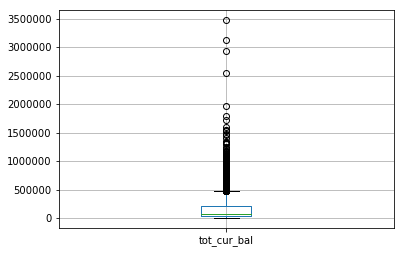

In [2064]:
# Boxplot
applicants.boxplot(column="tot_cur_bal")

**Inference**

As result of that one outlier, the mean is being pulled quite a bit (it's an *order of magnitude greater* than the median). Thus, in this case, the **median is a better value to fill the missing data with!**

In [2065]:
# Fill in missing values using the median
totCurrBalance.fillna(totCurrBalance.median(), inplace = True)
totCurrBalance.describe()

count    4.800700e+04
mean     1.198699e+05
std      1.286139e+05
min      0.000000e+00
25%      3.797800e+04
50%      7.857250e+04
75%      1.592310e+05
max      3.471522e+06
Name: tot_cur_bal, dtype: float64

In [2066]:
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,28000,0,7.62,6,4,325000.0,12,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,29150.980000,-1.0,38014.149757,799592.0,1
10,15000,0,14.47,11,3,98000.0,12,7.7,27.6,6.15,2.0,2.0,22.3,20800.0,15699.030000,-1.0,19643.159526,13038.0,1
15,3000,0,12.85,11,3,25000.0,12,66.7,52.3,24.68,0.0,8.0,54.2,4300.0,3181.532981,69.0,4490.698410,19530.0,1


In [2067]:
applicants.describe()

,loan_amnt,annual_inc,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
count,48007.000000,4.800700e+04,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,4.800700e+04,48007.000000
mean,13912.126877,7.197305e+04,52.813449,65.529200,16.527195,0.944091,6.046014,19307.550310,12095.277216,5.470286,19306.265294,1.198699e+05,0.693836
std,8138.152212,6.301178e+04,33.243624,26.466871,7.621150,1.093301,5.183448,17661.427288,9111.939465,17.376155,17705.651760,1.286139e+05,0.460903
min,1000.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,4.500000e+04,27.300000,49.800000,10.820000,0.000000,2.000000,7800.000000,5141.750000,-1.000000,7843.152367,3.797800e+04,0.000000
50%,12000.000000,6.200000e+04,52.813449,67.300000,16.250000,1.000000,5.000000,15400.000000,10090.739622,-1.000000,15330.468039,7.857250e+04,1.000000
75%,19125.000000,8.500000e+04,80.000000,88.000000,22.010000,2.000000,8.000000,23804.000000,16870.268150,-1.000000,23838.167257,1.592310e+05,1.000000
max,35000.000000,7.141778e+06,100.000000,339.600000,34.990000,8.000000,24.000000,301720.000000,50914.591249,152.000000,304742.866641,3.471522e+06,1.000000


In [2068]:
applicants.dtypes

loan_amnt                        int64
term                            object
int_rate                        object
emp_length                      object
home_ownership                  object
annual_inc                     float64
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                      object
total_bc_limit                 float64
total_pymnt                    float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
lowRiskApprove                   int64
dtype: object

Having cleaned up the data, the final thing left to do is convert any remaining categorical variables to numerical ones! Although we converted each feature to numerical as we cleaned, it seems from above like the object type has still been retained. This can easily be changed with the following:

In [2069]:
# Convert interest rate and revolving utilization rate to numerical dtypes
applicants["int_rate"] = applicants["int_rate"].astype(float)
applicants["revol_util"] = applicants["revol_util"].astype(float)
applicants["revol_util"].fillna(applicants["revol_util"].mean(), inplace = True) # fill in missed values using mean
applicants.dtypes

loan_amnt                        int64
term                            object
int_rate                       float64
emp_length                      object
home_ownership                  object
annual_inc                     float64
purpose                         object
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                     float64
total_bc_limit                 float64
total_pymnt                    float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
lowRiskApprove                   int64
dtype: object

In [2070]:
# Convert remaining cleaned categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

var_mod = ["term", "emp_length", "home_ownership", "purpose"]
le = LabelEncoder()
for i in var_mod:
    applicants[i] = le.fit_transform(applicants[i])
applicants.dtypes

loan_amnt                        int64
term                             int64
int_rate                       float64
emp_length                       int64
home_ownership                   int64
annual_inc                     float64
purpose                          int64
percent_bc_gt_75               float64
bc_util                        float64
dti                            float64
inq_last_6mths                 float64
mths_since_recent_inq          float64
revol_util                     float64
total_bc_limit                 float64
total_pymnt                    float64
mths_since_last_major_derog    float64
tot_hi_cred_lim                float64
tot_cur_bal                    float64
lowRiskApprove                   int64
dtype: object

In [2071]:
applicants.describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
count,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,4.800700e+04,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,4.800700e+04,48007.000000
mean,13912.126877,0.216010,14.659813,6.608161,3.414148,7.197305e+04,10.883913,52.813449,65.529200,16.527195,0.944091,6.046014,57.049064,19307.550310,12095.277216,5.470286,19306.265294,1.198699e+05,0.693836
std,8138.152212,0.411526,4.520052,3.709429,0.637173,6.301178e+04,2.097040,33.243624,26.466871,7.621150,1.093301,5.183448,24.208263,17661.427288,9111.939465,17.376155,17705.651760,1.286139e+05,0.460903
min,1000.000000,0.000000,6.000000,0.000000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,0.000000,11.550000,3.000000,3.000000,4.500000e+04,11.000000,27.300000,49.800000,10.820000,0.000000,2.000000,40.300000,7800.000000,5141.750000,-1.000000,7843.152367,3.797800e+04,0.000000
50%,12000.000000,0.000000,14.330000,7.000000,3.000000,6.200000e+04,12.000000,52.813449,67.300000,16.250000,1.000000,5.000000,59.400000,15400.000000,10090.739622,-1.000000,15330.468039,7.857250e+04,1.000000
75%,19125.000000,0.000000,17.770000,11.000000,4.000000,8.500000e+04,12.000000,80.000000,88.000000,22.010000,2.000000,8.000000,76.200000,23804.000000,16870.268150,-1.000000,23838.167257,1.592310e+05,1.000000
max,35000.000000,1.000000,26.060000,11.000000,4.000000,7.141778e+06,12.000000,100.000000,339.600000,34.990000,8.000000,24.000000,128.100000,301720.000000,50914.591249,152.000000,304742.866641,3.471522e+06,1.000000


We've cleaned up the data, and are now ready to do some exploratory analysis!

## Exploratory Data Analysis

Having finally cleaned the data, we can now investigate the various different relationships and biases that exist within it! This step is really helpful in identifying key features, and is essential before the modelling is done. Visual tools like histograms, boxplots, pivot tables, and bar graphs are really useful in this phase of the data science process.

Let's first take a look at the data:

In [2072]:
applicants.head(3)

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
3,28000,0,7.62,6,4,325000.0,12,16.7,67.1,18.55,1.0,3.0,54.6,42200.0,29150.980000,-1.0,38014.149757,799592.0,1
10,15000,0,14.47,11,3,98000.0,12,7.7,27.6,6.15,2.0,2.0,22.3,20800.0,15699.030000,-1.0,19643.159526,13038.0,1
15,3000,0,12.85,11,3,25000.0,12,66.7,52.3,24.68,0.0,8.0,54.2,4300.0,3181.532981,69.0,4490.698410,19530.0,1


In [2073]:
applicants.describe()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
count,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,4.800700e+04,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,48007.000000,4.800700e+04,48007.000000
mean,13912.126877,0.216010,14.659813,6.608161,3.414148,7.197305e+04,10.883913,52.813449,65.529200,16.527195,0.944091,6.046014,57.049064,19307.550310,12095.277216,5.470286,19306.265294,1.198699e+05,0.693836
std,8138.152212,0.411526,4.520052,3.709429,0.637173,6.301178e+04,2.097040,33.243624,26.466871,7.621150,1.093301,5.183448,24.208263,17661.427288,9111.939465,17.376155,17705.651760,1.286139e+05,0.460903
min,1000.000000,0.000000,6.000000,0.000000,0.000000,4.800000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000e+00,0.000000
25%,8000.000000,0.000000,11.550000,3.000000,3.000000,4.500000e+04,11.000000,27.300000,49.800000,10.820000,0.000000,2.000000,40.300000,7800.000000,5141.750000,-1.000000,7843.152367,3.797800e+04,0.000000
50%,12000.000000,0.000000,14.330000,7.000000,3.000000,6.200000e+04,12.000000,52.813449,67.300000,16.250000,1.000000,5.000000,59.400000,15400.000000,10090.739622,-1.000000,15330.468039,7.857250e+04,1.000000
75%,19125.000000,0.000000,17.770000,11.000000,4.000000,8.500000e+04,12.000000,80.000000,88.000000,22.010000,2.000000,8.000000,76.200000,23804.000000,16870.268150,-1.000000,23838.167257,1.592310e+05,1.000000
max,35000.000000,1.000000,26.060000,11.000000,4.000000,7.141778e+06,12.000000,100.000000,339.600000,34.990000,8.000000,24.000000,128.100000,301720.000000,50914.591249,152.000000,304742.866641,3.471522e+06,1.000000


**Initial Observations**

1. Looking at the averages across certain categories, a majority of the population/applicants seem to opt for a mid-sized loan, for a term of 36 months. They generally have been working for 10+ years, and either mortgage/own a home.

2. Over 69% of applicants should get their loan approved, according to our assumed criteria (they've been identified as "Low Risk" candidates). This makes sense, since it agrees with the above averages.

I'm interested in seeing how factors like Income, Employment Length, and Home Ownership affect the target variable. Also curious to see how significantly other variables correlate with each other + the target feature.


Before I start exploring the data, let's think about which features intuitively/conceptually should significantly impact an applicant's loan approval. If I think about it, this list would probably have:


**Pre-Exploration Brainstorming**

1. Income
2. Employment Length
3. Home Ownership
4. Credit Score (This can comprise of a combination of the current input feature/statistics)

I'm guessing that the above 4 factors will largely play a role in determining whether an applicant's loan should be approved or not.

Let's go and explore some of these hypotheses!

### Annual Income
Let's look at the distribution of the annual incomes

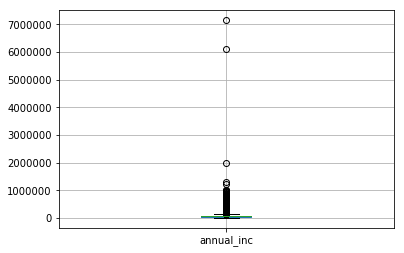

In [2074]:
applicants.boxplot(column="annual_inc")

Clearly, there are some strong outliers with the annual income category. This can either be attributed to noise in the dataset, or it can speak largely to the unequal distribution of wealth in society, where a majority of incomes fall within the range of each other, and the top 1% is vastly more wealthy! Really interesting insights!

### Employment Length

# of Applicants and Their Employment Length
11    14222
3      4446
6      3943
1      3724
4      3603
7      3308
5      3163
2      3103
8      2879
9      2185
10     1779
0      1652
Name: emp_length, dtype: int64
Effect of Employment Length on Loan Approvals
emp_length
0     0.563559
1     0.677497
2     0.707058
3     0.710976
4     0.702748
5     0.690800
6     0.707837
7     0.692261
8     0.684960
9     0.691991
10    0.685779
11    0.702995
Name: lowRiskApprove, dtype: float64


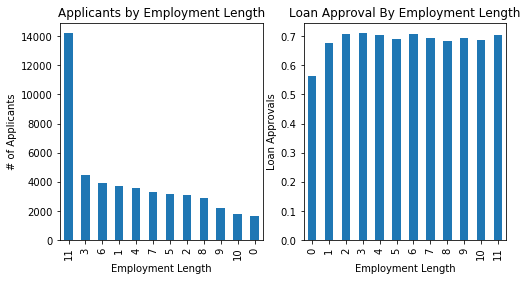

In [2075]:
temp1 = applicants["emp_length"].value_counts()
print "# of Applicants and Their Employment Length"
print temp1
temp2 = applicants.pivot_table(values="lowRiskApprove", index=['emp_length'])
print "Effect of Employment Length on Loan Approvals"
print temp2

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Employment Length")
ax1.set_ylabel("# of Applicants")
ax1.set_title("Applicants by Employment Length")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_ylabel("Loan Approvals")
ax2.set_title("Loan Approval By Employment Length")
temp2.plot(kind="bar")
ax2.set_xlabel("Employment Length")

Recall, the mapping for employment length was:

0 - n/a

1 - < 1 year

2 - 1 year

3 - 2 years

4 - 3 years

5 - 4 years

6 - 5 years

7 - 6 years

8 - 7 years

9 - 8 years

10 - 9 years

11 - 10+ years

Looking at the above plots, it seems like a large portion of the dataset is heavily skewed with applicants that have been working for more than 10 years (likely middle aged applicants). 

More interestingly, it seems like employment length doesn't seem to affect loan approvals! Notice that regardless of how long the applicant has been working, the likelihood of them getting their loan approved is largely the same! This invalidates our original hypothesis, and is a really interesting finding!

### Home Ownership

# of Applicants and Their Home Ownership
4    23745
3    20442
2     3792
0       15
1       13
Name: home_ownership, dtype: int64
Effect of Home Ownership on Loan Approvals
home_ownership
0    0.733333
1    0.384615
2    0.681435
3    0.656002
4    0.728532
Name: lowRiskApprove, dtype: float64


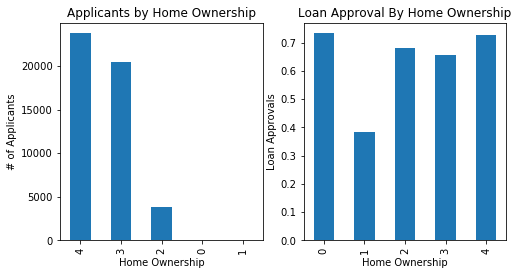

In [2076]:
temp1 = applicants["home_ownership"].value_counts()
print "# of Applicants and Their Home Ownership"
print temp1
temp2 = applicants.pivot_table(values="lowRiskApprove", index=['home_ownership'])
print "Effect of Home Ownership on Loan Approvals"
print temp2

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel("Home Ownership")
ax1.set_ylabel("# of Applicants")
ax1.set_title("Applicants by Home Ownership")
temp1.plot(kind="bar")

ax2 = fig.add_subplot(122)
ax2.set_ylabel("Loan Approvals")
ax2.set_title("Loan Approval By Home Ownership")
temp2.plot(kind="bar")
ax2.set_xlabel("Home Ownership")

Recall, the categories for home ownership are:

0 - NONE

1 - OTHER

2 - OWN

3 - RENT

4 - MORTGAGE

Once again, there's two interesting findings!

**1. Large Portion of Applicants Rent/Mortage Homes**

**2. Home Ownership doesn't seem to correlate highly with loan approvals**

Looking at the above two plots, it seems like the "Other" category is the only one where risk of loan approvals are lower (although to be fair, this category is heavily underrepresented in our data, so you cannot really take this at face value). Other than this, loan approvals seem equally as likely *regardless of the applicant's home ownership!*

### Correlations & Other Features

Having validated and invalidated some of our hypotheses in the initial exploration, we've realized that a key factor is understanding which features correlate largely with the target variable.


This can be understood numerically, with the cross-correlation matrix! Let's take a look:

In [2077]:
applicants.corr()

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,purpose,percent_bc_gt_75,bc_util,dti,inq_last_6mths,mths_since_recent_inq,revol_util,total_bc_limit,total_pymnt,mths_since_last_major_derog,tot_hi_cred_lim,tot_cur_bal,lowRiskApprove
loan_amnt,1.000000,0.465062,0.253617,0.124253,0.153439,0.296506,0.132979,0.009314,0.039329,0.028261,0.042018,-0.017169,0.090068,0.324722,0.742434,-0.033525,0.324393,0.259416,-0.065757
term,0.465062,1.000000,0.484085,0.086574,0.090904,0.072505,0.045061,0.033832,0.039327,0.068264,0.057770,-0.040157,0.061778,0.090846,0.260835,-0.008229,0.090934,0.118089,-0.127076
int_rate,0.253617,0.484085,1.000000,0.027199,-0.069416,0.001270,-0.012347,0.341314,0.365611,0.152343,0.223050,-0.182666,0.382091,-0.217025,0.080192,0.115087,-0.216407,-0.066386,-0.236764
emp_length,0.124253,0.086574,0.027199,1.000000,0.156062,0.081636,0.060625,0.045942,0.053414,0.033911,-0.003368,0.005440,0.065032,0.055117,0.098111,0.023593,0.055537,0.109814,0.020393
home_ownership,0.153439,0.090904,-0.069416,0.156062,1.000000,0.141759,0.046536,0.001369,0.003488,-0.017688,0.076448,-0.035401,0.015764,0.106516,0.143154,-0.004934,0.107421,0.394554,0.062217
annual_inc,0.296506,0.072505,0.001270,0.081636,0.141759,1.000000,-0.019521,-0.035307,-0.021858,-0.176352,0.070997,-0.039688,0.011717,0.222964,0.270530,0.012510,0.221830,0.336237,0.073018
purpose,0.132979,0.045061,-0.012347,0.060625,0.046536,-0.019521,1.000000,0.130125,0.151941,0.134575,-0.051439,0.038240,0.171727,0.013030,0.108298,0.016383,0.013213,0.028904,0.006072
percent_bc_gt_75,0.009314,0.033832,0.341314,0.045942,0.001369,-0.035307,0.130125,1.000000,0.842741,0.206698,-0.092807,0.053764,0.673053,-0.240590,-0.045842,-0.001294,-0.239898,-0.000334,-0.134427
bc_util,0.039329,0.039327,0.365611,0.053414,0.003488,-0.021858,0.151941,0.842741,1.000000,0.225219,-0.100239,0.058376,0.792381,-0.280540,-0.020098,0.002880,-0.279793,0.009542,-0.131368
dti,0.028261,0.068264,0.152343,0.033911,-0.017688,-0.176352,0.134575,0.206698,0.225219,1.000000,0.004035,0.009991,0.236021,0.007921,-0.054779,-0.011621,0.007898,0.004494,-0.144730


In [2078]:
# Look at target variable
applicants.corr()["lowRiskApprove"].sort_values()

int_rate                      -0.236764
dti                           -0.144730
revol_util                    -0.137039
percent_bc_gt_75              -0.134427
bc_util                       -0.131368
term                          -0.127076
loan_amnt                     -0.065757
inq_last_6mths                -0.043477
mths_since_last_major_derog   -0.002501
purpose                        0.006072
emp_length                     0.020393
mths_since_recent_inq          0.033450
home_ownership                 0.062217
annual_inc                     0.073018
tot_cur_bal                    0.074882
tot_hi_cred_lim                0.087082
total_bc_limit                 0.087628
total_pymnt                    0.486864
lowRiskApprove                 1.000000
Name: lowRiskApprove, dtype: float64

**Analysis**

Looking at the above correlation coeffecients, it's easy to determine which features are important in classifying an applicant's loan approval. Larger coeffecients/values indicate a stronger relationship between the feature and target variable, and vice-versa smaller values indicate a weaker/non-existent relationship.

From the results above, it seems like the following variables are strong predictors of whether a loan should be approved or not:
1. Interest Rate (larger interest rates -> lower approval)
2. Debt Obligation Ratio (larger ratio -> lower approval)
3. Revolving Line Utilization Rate (larger rate -> lower approval)
4. % of Bank Card Accounts > 75% of Limit (larger % -> lower approval)
5. Ratio of Current Bank Card Balance to Credit Limit -> (larger ratio -> lower approval)
6. Term (smaller term -> lower approval)
7. Total Payment (larger total payment -> higher approval)

Judging from the above features, it seems clear that the Credit Score related metrics are *much more significant in determining loan approval status!* This is in contrast to other personal metrics, like employment and home ownership!

It's also important to note that although there is variance amongst the correlation coeffecients, none of the correlation values are actually that high (indicting generally weak relationships). This is important to note, as it likely indicates the format and content of the dataset (in terms of features) aren't ideal for determining credit risk.

Having observed relationships within our data, and understood which features are relevant, we can now move on to modelling!

## Modelling & Prediction

Having explored the dataset, and obvserved some of it's biases and relationships, we are now ready to use a machine learning model to fit the data! Considering that this is a supervised learning (labelled dataset) classification task (picking between approve/don't approve), several categorical models come to mind, such as:

1. Logistic Regression
2. Decision Trees
3. Random Forests
4. Support Vector Machines (SVM)
5. Artificial Neural Nets (ANN)

It's important to remember that as the model becomes increasingly complex, so does the risk of overfitting and abstraction from results (making our model less interpretable). Remember: Occam's Razor!

Thus, for the sake of simplicity, a reduced risk of overfitting and considering the time restriction on the challenge, let's implement a basic Logistic Regression model. To increase the variability with our dataset and further reduce overfitting risk, we will use K-Fold Cross Validation.

### Logistic Regression

In [2079]:
# Import necessary ML models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import metrics

# Create data split
X = np.array(applicants.drop("lowRiskApprove", axis = 1))
Y = np.array(applicants["lowRiskApprove"])

# Instantiate model
model = LogisticRegression()

# Perform K-Fold cross validation with 5 folds
error = []
kf = KFold(n_splits = 5)

# K-Fold cross validation
for train_index, test_index in kf.split(X):
    
    # Create training data
    X_train = X[train_index]
    Y_train = Y[train_index]
    
    # Create testing data
    X_test = X[test_index]
    Y_test = Y[test_index]

    # Train the algorithm using the data and the targets
    model.fit(X_train, Y_train)

    # Errors
    error.append(model.score(X_train, Y_train))
    
print "Cross Validation Score: %s" % "{0: .3%}".format(np.mean(error))

Cross Validation Score:  99.556%


**Analysis/Evaluation**

Having implemented a simple Logistic Regression model above, we can analyze it's performance. With the complete set of features as input, the model performs with a net cross validation score (corresponding to the F1 score) of 99.556%!

Although this sounds amazing, it might be too good to be true (it's always good to be skeptical about whether the model is overfitting or not!). There are a few possible sources of error, that could be occuring. They are displayed below:

**Source of Error**

1. Feature Set (currently using the entire set of features -> may be leading to memorization)
2. Imbalanced Dataset (Dataset currently is heavily skewed towards middle aged, high income, good-credit applicants)
3. Incorrect Validation Metric (with imbalanced datasets, metrics like precision/recall/AUPRC are generally better!)
4. Small Dataset (with the reductions performed during the cleaning, the dataset has largely reduced in size)

Regradless of the above sources, the model is definitely a solid start in terms of performance, and there are a variety of steps that can be taken to further improve the model's performance. This includes:

**1. Hyperparameter Tuning**

With Logistic Regression, there's actually only a few key hyperparameters (regularization strength, threshold etc.) that can be tuned in order to manipulate performance. However, a small number of hyperparameters is beneficial since it greatly speedens up this stage of the optimization process. Small changes here can often lead to large benefits/returns in terms of performance.

**2. Feature Design/Selection**

With smarter feature selection, the input to the model can be improved greatly. This can mean a variety of things, including removing highly correlated features, manipulating/combining certain features to reduce the number of dimensions in the dataset (i.e. combining the credit related statistics into the user's credit score), using only the most significant features as input (this can be done through domain knowledge, or often a feature importance matrix that a RandomForest model can generate). Remember, models are often only as good as their input, so this step is an essential part of performance optimization.

**3. Model Selection**

Given more time for the challenge, I would definitely consider moving towards a Random Forest classifier. There are a variety of reasons for this, some are provided below:

- Ensemble methods are generally less prone to overfitting than traditional models
- Model is easy to implement, and interpret
- RF Models have the additional advantage of the Feature Importance Matrix, which can be helpful for feature selection (provides an order of significance/correlation for the input features)

These aspects, plus a lot more regarding design decisions, future improvements/things to be done with more time, other sources of data / features, additional improvements and interpretable components will be covered in the **secondary set of deliverables for this challenge!**

# Conclusion

I really enjoyed going through this problem! I'm excited to get feedback on my work here, learn how about how I can contribute towards the work at LendUp! Thanks so much for the opportunity!